<a href="https://colab.research.google.com/github/ASR16arif/Machine-Learning/blob/main/Cyber_Sentinel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

In [4]:
# Install kaggle and required dependencies
!pip install kaggle

In [5]:
from google.colab import files

In [8]:
# Upload the Kaggle credentials
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"asrarif","key":"be07789079edad86d416ac2615c24996"}'}

In [9]:
# Create a directory and copy credentials
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [10]:
# Download the dataset from Kaggle
! kaggle datasets download -d galaxyh/kdd-cup-1999-data

Dataset URL: https://www.kaggle.com/datasets/galaxyh/kdd-cup-1999-data
License(s): unknown
kdd-cup-1999-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [11]:
# Download the dataset from Kaggle
! kaggle datasets download -d solarmainframe/ids-intrusion-csv

Dataset URL: https://www.kaggle.com/datasets/solarmainframe/ids-intrusion-csv
License(s): Attribution 4.0 International (CC BY 4.0)
100% 1.60G/1.60G [00:59<00:00, 34.1MB/s]
100% 1.60G/1.60G [00:59<00:00, 28.8MB/s]


In [12]:
# Unzip the dataset
!unzip kdd-cup-1999-data.zip

Archive:  kdd-cup-1999-data.zip
  inflating: corrected.gz            
  inflating: corrected/corrected     
  inflating: kddcup.data.corrected   
  inflating: kddcup.data.gz          
  inflating: kddcup.data/kddcup.data  
  inflating: kddcup.data_10_percent.gz  
  inflating: kddcup.data_10_percent/kddcup.data_10_percent  
  inflating: kddcup.data_10_percent_corrected  
  inflating: kddcup.names            
  inflating: kddcup.newtestdata_10_percent_unlabeled.gz  
  inflating: kddcup.newtestdata_10_percent_unlabeled/kddcup.newtestdata_10_percent_unlabeled  
  inflating: kddcup.testdata.unlabeled.gz  
  inflating: kddcup.testdata.unlabeled/kddcup.testdata.unlabeled  
  inflating: kddcup.testdata.unlabeled_10_percent.gz  
  inflating: kddcup.testdata.unlabeled_10_percent/kddcup.testdata.unlabeled_10_percent  
  inflating: training_attack_types   
  inflating: typo-correction.txt     


In [13]:
# Unzip the dataset
!unzip ids-intrusion-csv.zip

Archive:  ids-intrusion-csv.zip
  inflating: 02-14-2018.csv          
  inflating: 02-15-2018.csv          
  inflating: 02-16-2018.csv          
  inflating: 02-20-2018.csv          
  inflating: 02-21-2018.csv          
  inflating: 02-22-2018.csv          
  inflating: 02-23-2018.csv          
  inflating: 02-28-2018.csv          
  inflating: 03-01-2018.csv          
  inflating: 03-02-2018.csv          


In [14]:
# Load the KDD CUP 1999 dataset
kdd_df = pd.read_csv('kddcup.data.corrected', header=None)

In [15]:
kdd_df.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


from matplotlib import pyplot as plt
_df_53[4].plot(kind='hist', bins=20, title=4)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_54[5].plot(kind='hist', bins=20, title=5)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_55[22].plot(kind='hist', bins=20, title=22)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_56[23].plot(kind='hist', bins=20, title=23)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_57.plot(kind='scatter', x=4, y=5, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_58.plot(kind='scatter', x=5, y=22, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_59.plot(kind='scatter', x=22, y=23, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_60.plot(kind='scatter', x=23, y=31, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series[0]
  ys = series[4]
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_61.sort_values(0, ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel(0)
_ = plt.ylabel(4)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series[0]
  ys = series[5]
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_62.sort_values(0, ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel(0)
_ = plt.ylabel(5)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series[0]
  ys = series[22]
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_63.sort_values(0, ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel(0)
_ = plt.ylabel(22)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series[0]
  ys = series[23]
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_64.sort_values(0, ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel(0)
_ = plt.ylabel(23)

from matplotlib import pyplot as plt
_df_65[4].plot(kind='line', figsize=(8, 4), title=4)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_66[5].plot(kind='line', figsize=(8, 4), title=5)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_67[22].plot(kind='line', figsize=(8, 4), title=22)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_68[23].plot(kind='line', figsize=(8, 4), title=23)
plt.gca().spines[['top', 'right']].set_visible(False)

In [16]:
#Reset column names for KDD CUP 1999 dataset
kdd_df.columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
'num_access_files', 'num_outbound_cmds', 'is_host_login',
'is_guest_login', 'count', 'srv_count', 'serror_rate',
'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
'dst_host_srv_count', 'dst_host_same_srv_rate','dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
'dst_host_srv_rerror_rate', 'label']

In [17]:
kdd_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


from matplotlib import pyplot as plt
_df_37['src_bytes'].plot(kind='hist', bins=20, title='src_bytes')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_38['dst_bytes'].plot(kind='hist', bins=20, title='dst_bytes')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_39['count'].plot(kind='hist', bins=20, title='count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_40['srv_count'].plot(kind='hist', bins=20, title='srv_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_41.plot(kind='scatter', x='src_bytes', y='dst_bytes', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_42.plot(kind='scatter', x='dst_bytes', y='count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_43.plot(kind='scatter', x='count', y='srv_count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_44.plot(kind='scatter', x='srv_count', y='dst_host_count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['duration']
  ys = series['src_bytes']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_45.sort_values('duration', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('duration')
_ = plt.ylabel('src_bytes')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['duration']
  ys = series['dst_bytes']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_46.sort_values('duration', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('duration')
_ = plt.ylabel('dst_bytes')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['duration']
  ys = series['count']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_47.sort_values('duration', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('duration')
_ = plt.ylabel('count')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['duration']
  ys = series['srv_count']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_48.sort_values('duration', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('duration')
_ = plt.ylabel('srv_count')

from matplotlib import pyplot as plt
_df_49['src_bytes'].plot(kind='line', figsize=(8, 4), title='src_bytes')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_50['dst_bytes'].plot(kind='line', figsize=(8, 4), title='dst_bytes')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_51['count'].plot(kind='line', figsize=(8, 4), title='count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_52['srv_count'].plot(kind='line', figsize=(8, 4), title='srv_count')
plt.gca().spines[['top', 'right']].set_visible(False)

In [18]:
# Load the CSE-CIC-IDS2018 dataset
cic_df = pd.read_csv('03-02-2018.csv')

In [19]:
cic_df.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,443,6,02/03/2018 08:47:38,141385,9,7,553,3773.0,202,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,49684,6,02/03/2018 08:47:38,281,2,1,38,0.0,38,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,443,6,02/03/2018 08:47:40,279824,11,15,1086,10527.0,385,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,443,6,02/03/2018 08:47:40,132,2,0,0,0.0,0,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,443,6,02/03/2018 08:47:41,274016,9,13,1285,6141.0,517,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


from matplotlib import pyplot as plt
_df_16['Dst Port'].plot(kind='hist', bins=20, title='Dst Port')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17['Flow Duration'].plot(kind='hist', bins=20, title='Flow Duration')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18['Tot Fwd Pkts'].plot(kind='hist', bins=20, title='Tot Fwd Pkts')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19['Tot Bwd Pkts'].plot(kind='hist', bins=20, title='Tot Bwd Pkts')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_20.groupby('Timestamp').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_21.plot(kind='scatter', x='Dst Port', y='Flow Duration', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_22.plot(kind='scatter', x='Flow Duration', y='Tot Fwd Pkts', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_23.plot(kind='scatter', x='Tot Fwd Pkts', y='Tot Bwd Pkts', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_24.plot(kind='scatter', x='Tot Bwd Pkts', y='TotLen Fwd Pkts', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Protocol']
  ys = series['Dst Port']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_25.sort_values('Protocol', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Timestamp')):
  _plot_series(series, series_name, i)
  fig.legend(title='Timestamp', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Protocol')
_ = plt.ylabel('Dst Port')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Protocol']
  ys = series['Flow Duration']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_26.sort_values('Protocol', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Timestamp')):
  _plot_series(series, series_name, i)
  fig.legend(title='Timestamp', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Protocol')
_ = plt.ylabel('Flow Duration')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Protocol']
  ys = series['Tot Fwd Pkts']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_27.sort_values('Protocol', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Timestamp')):
  _plot_series(series, series_name, i)
  fig.legend(title='Timestamp', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Protocol')
_ = plt.ylabel('Tot Fwd Pkts')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Protocol']
  ys = series['Tot Bwd Pkts']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_28.sort_values('Protocol', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Timestamp')):
  _plot_series(series, series_name, i)
  fig.legend(title='Timestamp', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Protocol')
_ = plt.ylabel('Tot Bwd Pkts')

from matplotlib import pyplot as plt
_df_29['Dst Port'].plot(kind='line', figsize=(8, 4), title='Dst Port')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_30['Flow Duration'].plot(kind='line', figsize=(8, 4), title='Flow Duration')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_31['Tot Fwd Pkts'].plot(kind='line', figsize=(8, 4), title='Tot Fwd Pkts')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_32['Tot Bwd Pkts'].plot(kind='line', figsize=(8, 4), title='Tot Bwd Pkts')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_33['Timestamp'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_33, x='Dst Port', y='Timestamp', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_34['Timestamp'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_34, x='Flow Duration', y='Timestamp', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_35['Timestamp'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_35, x='Tot Fwd Pkts', y='Timestamp', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_36['Timestamp'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_36, x='Tot Bwd Pkts', y='Timestamp', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [20]:
# Select and rename columns for consistency with KDD CUP 1999 dataset
cic_df = cic_df[['Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts',
                 'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min', 'Fwd Pkt Len Mean',
                 'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Label']]


In [21]:
cic_df.columns = ['duration', 'src_bytes', 'dst_bytes', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts',
                  'Fwd Pkt Len Max', 'Fwd Pkt Len Min', 'Fwd Pkt Len Mean',
                  'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'label']

In [22]:
cic_df.head()

,duration,src_bytes,dst_bytes,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,label
0,141385,9,7,553,3773.0,202,0,61.444444,1460,0,539.000000,Benign
1,281,2,1,38,0.0,38,0,19.000000,0,0,0.000000,Benign
2,279824,11,15,1086,10527.0,385,0,98.727273,1460,0,701.800000,Benign
3,132,2,0,0,0.0,0,0,0.000000,0,0,0.000000,Benign
4,274016,9,13,1285,6141.0,517,0,142.777778,1460,0,472.384615,Benign


from matplotlib import pyplot as plt
_df_0['duration'].plot(kind='hist', bins=20, title='duration')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['src_bytes'].plot(kind='hist', bins=20, title='src_bytes')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['dst_bytes'].plot(kind='hist', bins=20, title='dst_bytes')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['TotLen Fwd Pkts'].plot(kind='hist', bins=20, title='TotLen Fwd Pkts')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='duration', y='src_bytes', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='src_bytes', y='dst_bytes', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='dst_bytes', y='TotLen Fwd Pkts', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='TotLen Fwd Pkts', y='TotLen Bwd Pkts', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Fwd Pkt Len Min']
  ys = series['duration']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Fwd Pkt Len Min', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Fwd Pkt Len Min')
_ = plt.ylabel('duration')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Fwd Pkt Len Min']
  ys = series['src_bytes']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('Fwd Pkt Len Min', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Fwd Pkt Len Min')
_ = plt.ylabel('src_bytes')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Fwd Pkt Len Min']
  ys = series['dst_bytes']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Fwd Pkt Len Min', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Fwd Pkt Len Min')
_ = plt.ylabel('dst_bytes')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Fwd Pkt Len Min']
  ys = series['TotLen Fwd Pkts']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('Fwd Pkt Len Min', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Fwd Pkt Len Min')
_ = plt.ylabel('TotLen Fwd Pkts')

from matplotlib import pyplot as plt
_df_12['duration'].plot(kind='line', figsize=(8, 4), title='duration')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['src_bytes'].plot(kind='line', figsize=(8, 4), title='src_bytes')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['dst_bytes'].plot(kind='line', figsize=(8, 4), title='dst_bytes')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['TotLen Fwd Pkts'].plot(kind='line', figsize=(8, 4), title='TotLen Fwd Pkts')
plt.gca().spines[['top', 'right']].set_visible(False)

In [23]:
# Encode categorical features in the KDD CUP 1999 dataset
le = LabelEncoder()
kdd_df['protocol_type'] = le.fit_transform(kdd_df['protocol_type'])
kdd_df['service'] = le.fit_transform(kdd_df['service'])
kdd_df['flag'] = le.fit_transform(kdd_df['flag'])
kdd_df['label'] = le.fit_transform(kdd_df['label'])

In [24]:
# Encode labels for consistency
cic_df['label'] = le.fit_transform(cic_df['label'])

In [25]:
# Fill missing values in CSE-CIC-IDS2018 dataset with 0
cic_df.fillna(0, inplace=True)

In [26]:
# Select common columns between both datasets for merging
common_columns = ['duration', 'src_bytes', 'dst_bytes', 'label']

In [27]:
# Filter both datasets by common columns
kdd_df_common = kdd_df[common_columns]
cic_df_common = cic_df[common_columns]

In [28]:
# Combine the datasets
combined_df = pd.concat([kdd_df_common, cic_df_common], ignore_index=True)

In [29]:
# Separate features and target variable
X = combined_df.drop('label', axis=1)
y = combined_df['label']

In [30]:
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [31]:
# Convert the target to categorical for multiclass classification
y = to_categorical(y)

In [32]:
# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Reshape data to fit Conv1D input requirements (samples, timesteps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [34]:
# Build the CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
#model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout to prevent overfitting
model.add(Dense(y.shape[1], activation='softmax'))  # Output layer with softmax for multiclass classification


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [36]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
148676/148676 ━━━━━━━━━━━━━━━━━━━━ 492s 3ms/step - accuracy: 0.8052 - loss: 0.6256 - val_accuracy: 0.8731 - val_loss: 0.4212
Epoch 2/10
148676/148676 ━━━━━━━━━━━━━━━━━━━━ 496s 3ms/step - accuracy: 0.8637 - loss: 0.4526 - val_accuracy: 0.8680 - val_loss: 0.5066
Epoch 3/10
148676/148676 ━━━━━━━━━━━━━━━━━━━━ 490s 3ms/step - accuracy: 0.8646 - loss: 0.4978 - val_accuracy: 0.8730 - val_loss: 0.4424
Epoch 4/10
148676/148676 ━━━━━━━━━━━━━━━━━━━━ 504s 3ms/step - accuracy: 0.8664 - loss: 0.4380 - val_accuracy: 0.8655 - val_loss: 0.4358
Epoch 5/10
148676/148676 ━━━━━━━━━━━━━━━━━━━━ 486s 3ms/step - accuracy: 0.8652 - loss: 0.4837 - val_accuracy: 0.8761 - val_loss: 0.4517
Epoch 6/10
148676/148676 ━━━━━━━━━━━━━━━━━━━━ 482s 3ms/step - accuracy: 0.8646 - loss: 0.5138 - val_accuracy: 0.8755 - val_loss: 0.5511
Epoch 7/10
148676/148676 ━━━━━━━━━━━━━━━━━━━━ 480s 3ms/step - accuracy: 0.8662 - loss: 0.5843 - val_accuracy: 0.8727 - val_loss: 0.5873
Epoch 8/10
148676/148676 ━━━━━━━━━━━━━━━━━━━━ 49

In [37]:
# Evaluate the model
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_test_labels = np.argmax(y_test, axis=1)

37169/37169 ━━━━━━━━━━━━━━━━━━━━ 68s 2ms/step


In [38]:
# Classification report and confusion matrix
print(classification_report(y_test_labels, y_pred))
print(confusion_matrix(y_test_labels, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       1.00      0.56      0.72    152322
           1       0.00      0.00      0.00     57089
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00      2449
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         1
           9       0.59      1.00      0.75    214274
          10       0.00      0.00      0.00       508
          11       1.00      0.91      0.95    194783
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00        39
          15       0.00      0.00      0.00      2028
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00      3117
          18       1.00    

In [39]:
# Save model and architecture to a single file
model.save("intrusion_detection_cnn_combined.h5")
print("Model saved as intrusion_detection_cnn_combined.h5")

Model saved as intrusion_detection_cnn_combined.h5


In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.utils import to_categorical
import os

In [41]:
# Precision, Recall, F1-Score, Accuracy
accuracy = accuracy_score(y_test_labels, y_pred)
precision = precision_score(y_test_labels, y_pred, average='weighted')
recall = recall_score(y_test_labels, y_pred, average='weighted')
f1 = f1_score(y_test_labels, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.8741
Precision: 0.8687
Recall: 0.8741
F1-Score: 0.8539


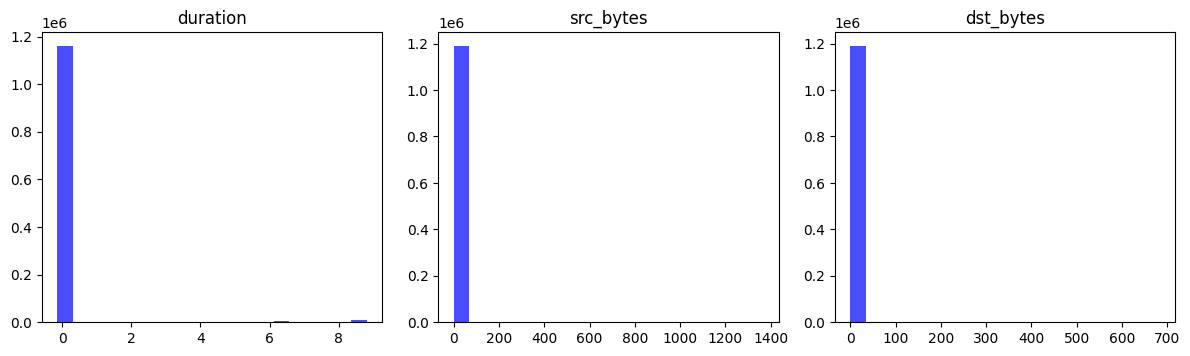

In [42]:
# Frequency Distributions of Scaled Features of Testing Set
plt.figure(figsize=(12, 10))
for i, feature in enumerate(combined_df.columns[:-1]):
    plt.subplot(3, 3, i+1)
    plt.hist(X_test[:, i], bins=20, color='blue', alpha=0.7)
    plt.title(f'{feature}')
    plt.tight_layout()

plt.show()

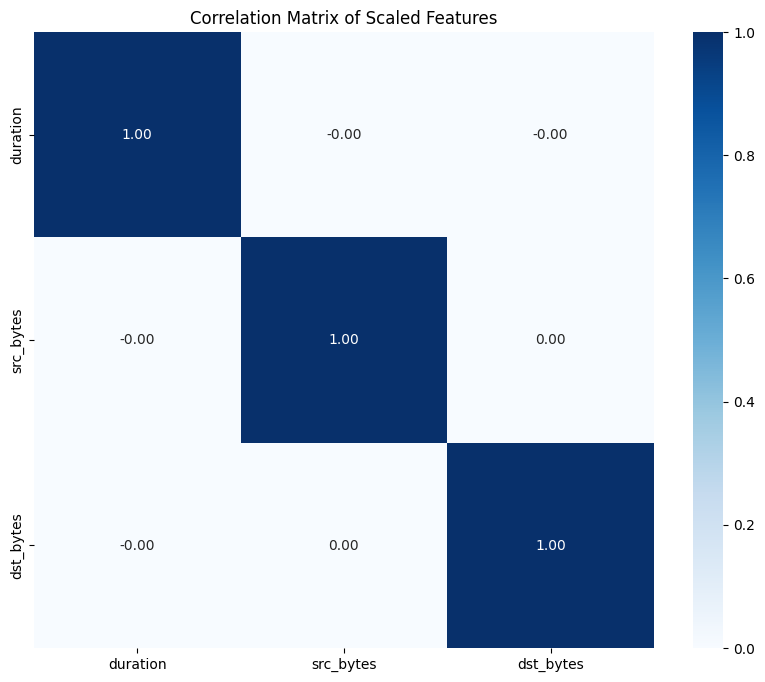

In [43]:
# Correlation Matrix
corr_matrix = pd.DataFrame(X_test.reshape(X_test.shape[0], X_test.shape[1]), columns=combined_df.columns[:-1]).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='Blues')
plt.title('Correlation Matrix of Scaled Features')
plt.show()

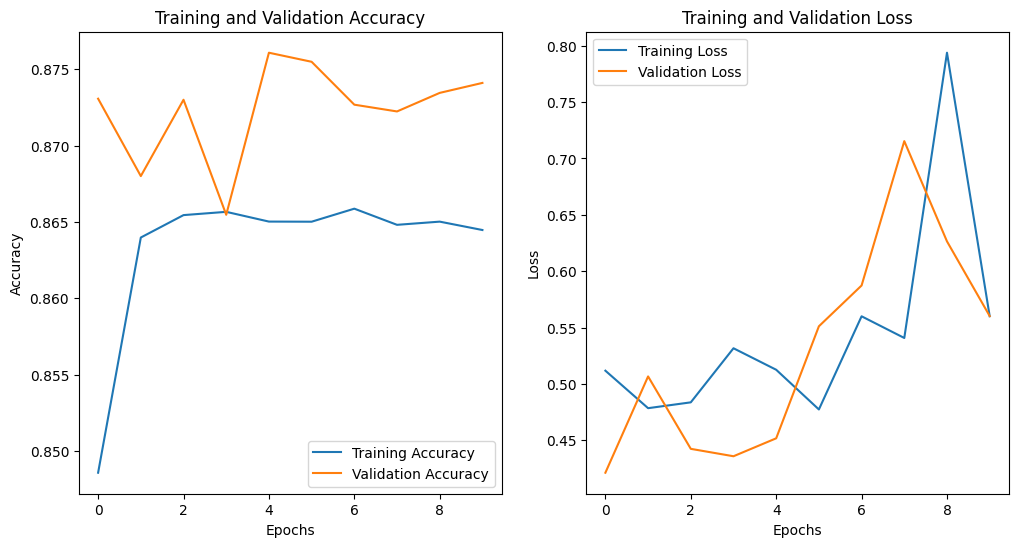

In [44]:
# Plotting the training/validation accuracy and loss

# Accuracy
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [45]:
# Display the plots
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>